In [1]:
import pytest
import numpy as np
import finite
import timesteppers
import equations
from IPython.display import clear_output
import matplotlib.pyplot as plt

#plotting the 2D PDF
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
   
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()

#plotting the 2D PDF for single slit 
def plot_2D_fieldSlit(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    N = len(data)
    m = int(N/2)
    data[0:m-5,m-10:m+10]=float("nan")
    data[m+5:-1,m-10:m+10]=float("nan")
    pcm = ax.pcolormesh(xm, ym, data)
    fig.colorbar(pcm)
    ax.set_aspect(1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()

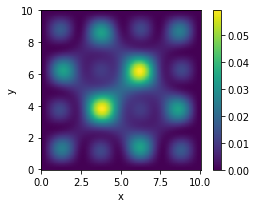

0.02512562814070352

In [41]:
#Linear schrodinger case 
resolution = 200
grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()


IC = (np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10))*1/np.sqrt(50)
c = IC.astype(complex)

diff = equations.SchrodingerBCNonLinear(c,4, domain,0)

alpha = 0.5
dt = alpha*grid_y.dx
n=0
cadence = 10
xm, ym  = np.meshgrid(x, y)
T = 5
while diff.t < T - 1e-5:
    if n % cadence == 0 :
        data = np.abs(c)**2
        clear_output(wait=True)
        plot_2D_field(xm,ym,data)
        plt.show()
    n = n+1
    diff.step(dt)

dt

0.02512562814070352


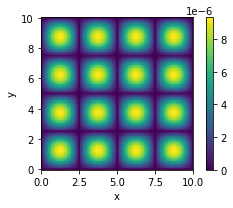

In [42]:
#comparing values to analytic solution
t = 5
x, y = domain.values()
sol = (np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)*np.exp(-1j*np.pi**2/100*t)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10)*np.exp(-1j*16*np.pi**2/100*t))*1/np.sqrt(50)
data2 = abs(sol)**2
plot_2D_field(xm,ym,abs(sol-c))
np.shape(sol)
np.max(abs(sol-c))
print(dt)

In [45]:
#getting errors for varying dt
res = np.array([100,150,200,250,300,350,400])
error = np.zeros(len(res))
dts = np.zeros(len(res))
for i in range(len(res)):
    resolution = res[i]
    grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
    grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
    domain = finite.Domain([grid_x, grid_y])
    x, y = domain.values()


    IC = (np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10))/np.sqrt(50)
    c = IC.astype(complex)

    diff = equations.SchrodingerBCNonLinear(c,4, domain,0)

    alpha = 0.5
    dt = alpha*grid_y.dx
    n=0
    cadence = 10
    xm, ym  = np.meshgrid(x, y)
    T = 5
    while diff.t < T - 1e-5:
        diff.step(dt)
    x, y = domain.values()
    t = 5
    sol = (np.sin(np.pi*(x)/10)*np.sin(np.pi*(y)/10)*np.exp(-1j*np.pi**2/100*t)+np.sin(4*np.pi*(x)/10)*np.sin(4*np.pi*(y)/10)*np.exp(-1j*16*np.pi**2/100*t))*1/np.sqrt(50)
    error[i] = np.max(abs(sol-c))
    dts[i] = dt


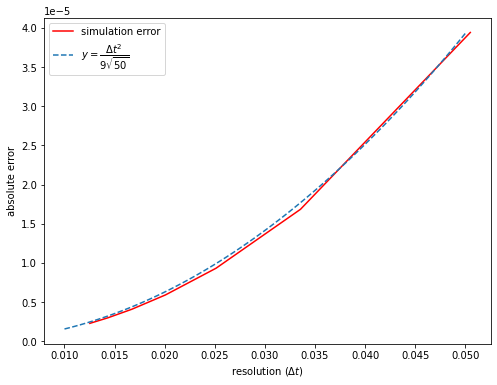

In [46]:
#plotting the error
from matplotlib import cm, colors
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


x = np.linspace(0.01,0.05,100)
ax.set_xlabel('resolution $(\Delta t)$')
ax.set_ylabel('absolute error')
ax.plot(dts,error,'red',label='simulation error')
ax.plot(x,x**2/9/np.sqrt(50),'--',label = r'$y=\dfrac{\Delta t^2}{9 \sqrt{50}}$')

ax.legend()

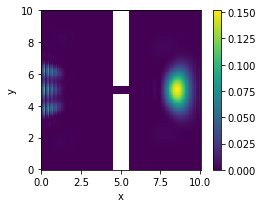

In [47]:
#single slit simulation
resolution = 200
grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()

xm, ym  = np.meshgrid(x, y)
IC = np.exp(-(xm-1)**2)*np.exp(-(ym-5)**2+8*1j*np.pi*(xm-1))
c = IC.astype(complex)
shape = np.shape(IC)

diff = equations.SchrodingerBCLinearSlit(c,4, domain,0)

alpha = 0.1
dt = alpha*grid_y.dx
n=0
cadence = 5
T = 0.4
while diff.t < T - 1e-5:
    if n % cadence == 0 :
        data = np.abs(c)**2
        clear_output(wait=True)
        plot_2D_fieldSlit(xm,ym,data)
        plt.show()
    n = n+1
    diff.step(dt)


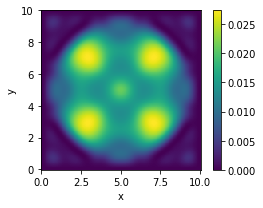

In [48]:
#non-linear scenario 
resolution = 200
grid_x = finite.UniformNonPeriodicGrid(resolution,(0,10))
grid_y = finite.UniformNonPeriodicGrid(resolution,(0,10))
domain = finite.Domain([grid_x, grid_y])
x, y = domain.values()

xm, ym  = np.meshgrid(x, y)
IC = (np.sin(np.pi*(xm)/10)*np.sin(np.pi*(ym)/10))/5
c = IC.astype(complex)
c = IC.astype(complex)
g = 100
diff = equations.SchrodingerBCNonLinear(c,4, domain,g)

alpha = 0.5
dt = alpha*grid_y.dx
n=0
cadence = 10
xm, ym  = np.meshgrid(x, y)
T = 9 
while diff.t < T- 1e-5:
    if n % cadence == 0 :
        data = np.abs(c)**2
        clear_output(wait=True)
        plot_2D_field(xm,ym,data)
        plt.show()
    n = n+1
    diff.step(dt)
